<a href="https://colab.research.google.com/github/aboivz/Performing-EDA-on-Spotify-Dataset/blob/main/Performing%20EDA%20on%20Spotify%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading Dataset

In [ ]:
data = pd.read_csv('spotify.csv')

In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
artist_data = pd.read_csv('data_by_artist.csv')
artist_data.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [ ]:
genre_data = pd.read_csv('data_by_genres.csv')
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [ ]:
year_data = pd.read_csv('data_by_year.csv')
year_data.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [ ]:
#use info method to find the number of column and the number of valance, ..., tempo.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
artist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [ ]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [ ]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [ ]:
#null values (sum function to check the number of nonvalues represent in dataset)
pd.isnull(data).sum()
pd.isnull(artist_data).sum()
pd.isnull(genre_data).sum()
pd.isnull(year_data).sum()

mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [ ]:
#find the statistic about 'count', 'mean', ..., 'max'
data.describe().transpose()
artist_data.describe().transpose()
genre_data.describe().transpose()
year_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mode,100.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
year,100.0,1970.500000,29.011492,1921.000000,1945.750000,1970.500000,1995.250000,2020.000000
acousticness,100.0,0.556317,0.275358,0.219931,0.289516,0.459190,0.856711,0.962607
danceability,100.0,0.536783,0.052356,0.414445,0.500800,0.540976,0.570948,0.692904
duration_ms,100.0,227296.752234,25630.048065,156881.657475,210889.193536,235520.850833,247702.738058,267677.823086
energy,100.0,0.452705,0.161738,0.207948,0.280733,0.495997,0.598008,0.681778
instrumentalness,100.0,0.193582,0.122488,0.016376,0.103323,0.127644,0.276707,0.581701
liveness,100.0,0.208224,0.017903,0.168450,0.197509,0.206074,0.218493,0.264335
loudness,100.0,-11.969054,3.105610,-19.275282,-14.189232,-11.773061,-9.950542,-6.595067
speechiness,100.0,0.105861,0.082128,0.049098,0.064244,0.085763,0.104438,0.490001


In [ ]:
#check the artist present in 18 years old in dataset
data[["artists"]].iloc[18]

artists    ['THE GUY']
Name: 18, dtype: object

In [ ]:
#variance of the dataset
data.var()

valence             6.737413e-02
year                7.285064e+02
acousticness        1.424709e-01
danceability        3.019951e-02
duration_ms         1.441510e+10
energy              6.925253e-02
explicit            7.794954e-02
instrumentalness    9.996761e-02
key                 1.225227e+01
liveness            2.686172e-02
loudness            3.175582e+01
mode                2.061501e-01
popularity          5.879455e+02
speechiness         3.141219e-02
tempo               9.434626e+02
dtype: float64

In [ ]:
#covariance of the dataset
data.cov()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,0.067374,-0.110458,-0.016973,0.025222,-6.223991e+03,0.024530,-0.001795,-0.014317,0.026810,0.000729,0.453886,0.001963,0.145052,0.002109,1.484146
year,-0.110458,728.506417,-6.693860,0.828569,3.401128e+05,4.090172,1.676903,-2.715093,0.397737,-0.325583,79.240599,-0.319942,588.852326,-0.964476,116.770490
acousticness,-0.016973,-6.693860,0.142471,-0.017180,-4.342069e+03,-0.074144,-0.028466,0.043251,-0.024848,-0.000300,-1.167650,0.007351,-5.847960,-0.004183,-2.252754
danceability,0.025222,0.828569,-0.017180,0.030200,-3.099658e+03,0.010004,0.012168,-0.014503,0.014061,-0.002590,0.261515,-0.003563,0.785048,0.007715,0.068809
duration_ms,-6223.991219,340112.825525,-4342.069420,-3099.658341,1.441510e+10,1898.743801,-1584.187532,2778.766089,-2145.301477,599.763824,8488.587832,-2501.109866,278123.708902,-1909.265737,-107080.902284
energy,0.024530,4.090172,-0.074144,0.010004,1.898744e+03,0.069253,0.009495,-0.024763,0.017510,0.004204,1.162421,-0.003648,3.522652,-0.004717,1.976266
explicit,-0.001795,1.676903,-0.028466,0.012168,-1.584188e+03,0.009495,0.077950,-0.013101,0.006391,0.001989,0.204061,-0.010048,1.166556,0.021230,0.125431
instrumentalness,-0.014317,-2.715093,0.043251,-0.014503,2.778766e+03,-0.024763,-0.013101,0.099968,-0.015192,-0.002010,-0.728693,-0.004871,-2.637065,-0.006827,-1.076042
key,0.026810,0.397737,-0.024848,0.014061,-2.145301e+03,0.017510,0.006391,-0.015192,12.252274,-0.000240,0.155974,-0.163535,0.327113,0.015885,0.597336
liveness,0.000729,-0.325583,-0.000300,-0.002590,5.997638e+02,0.004204,0.001989,-0.002010,-0.000240,0.026862,0.042184,0.000208,-0.346729,0.003551,0.008347


In [ ]:
#correlation in the dataset
%pip install scipy
data_corr = data.corr(method='kendall')
print(data_corr)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
                   valence      year  acousticness  danceability  duration_ms  \
valence           1.000000 -0.009654     -0.099244      0.376507    -0.137471   
year             -0.009654  1.000000     -0.494341      0.112703     0.199391   
acousticness     -0.099244 -0.494341      1.000000     -0.157252    -0.168589   
danceability      0.376507  0.112703     -0.157252      1.000000    -0.066259   
duration_ms      -0.137471  0.199391     -0.168589     -0.066259     1.000000   
energy            0.252225  0.400839     -0.551929      0.147254     0.138714   
explicit         -0.025337  0.174164     -0.212209      0.207875    -0.021882   
instrumentalness -0.096188 -0.225539      0.244221     -0.185952     0.063867   
key               0.020219  0.002313     -0.010427      0.015400    -0.002831   
liveness         -0.001818 -0.082696      0.024002     -0.071813    -0.055107   
loudness  

In [ ]:
artist_data.var()

mode                1.828372e-01
count               2.848628e+03
acousticness        1.373551e-01
danceability        3.114304e-02
duration_ms         1.467292e+10
energy              6.496640e-02
instrumentalness    8.904620e-02
liveness            1.984823e-02
loudness            3.331309e+01
speechiness         1.254089e-02
tempo               6.251917e+02
valence             5.974155e-02
popularity          5.007050e+02
key                 1.211424e+01
dtype: float64

In [ ]:
artist_data.cov()

,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
mode,0.182837,1.701827,0.019592,-0.008008,-1.720491e+03,-0.012296,-0.003132,0.001412,-0.183369,-0.002356,-0.130392,-0.001243,-0.949006,-0.137770
count,1.701827,2848.628421,0.447177,-0.246841,-5.177373e+04,-0.466872,0.059887,0.069534,-10.091011,0.090857,0.698560,-0.005506,-53.642645,-6.332357
acousticness,0.019592,0.447177,0.137355,-0.027602,-2.658610e+03,-0.075706,0.031988,0.001762,-1.344238,-0.001458,-2.437443,-0.018646,-4.617477,-0.047865
danceability,-0.008008,-0.246841,-0.027602,0.031143,-2.422554e+03,0.018015,-0.016587,-0.002550,0.483633,0.005228,0.527799,0.025826,0.972536,0.019508
duration_ms,-1720.490979,-51773.726972,-2658.610057,-2422.553797,1.467292e+10,-45.144296,4252.709375,-354.190277,-58080.108608,187.899631,-136358.428208,-5924.432101,27475.416691,-4851.941821
energy,-0.012296,-0.466872,-0.075706,0.018015,-4.514430e+01,0.064966,-0.022048,0.003658,1.168581,0.002023,1.955452,0.023594,2.367443,0.038210
instrumentalness,-0.003132,0.059887,0.031988,-0.016587,4.252709e+03,-0.022048,0.089046,-0.002487,-0.768411,-0.005026,-0.958200,-0.018771,-1.572820,-0.019594
liveness,0.001412,0.069534,0.001762,-0.002550,-3.541903e+02,0.003658,-0.002487,0.019848,0.043438,0.002778,-0.114378,0.000457,-0.378609,-0.001048
loudness,-0.183369,-10.091011,-1.344238,0.483633,-5.808011e+04,1.168581,-0.768411,0.043438,33.313092,0.030469,39.142344,0.549141,42.999715,0.635771
speechiness,-0.002356,0.090857,-0.001458,0.005228,1.878996e+02,0.002023,-0.005026,0.002778,0.030469,0.012541,-0.045739,0.002876,-0.064712,0.005513


In [ ]:
artist_data = data.corr(method='kendall')
print(artist_data)

                   valence      year  acousticness  danceability  duration_ms  \
valence           1.000000 -0.009654     -0.099244      0.376507    -0.137471   
year             -0.009654  1.000000     -0.494341      0.112703     0.199391   
acousticness     -0.099244 -0.494341      1.000000     -0.157252    -0.168589   
danceability      0.376507  0.112703     -0.157252      1.000000    -0.066259   
duration_ms      -0.137471  0.199391     -0.168589     -0.066259     1.000000   
energy            0.252225  0.400839     -0.551929      0.147254     0.138714   
explicit         -0.025337  0.174164     -0.212209      0.207875    -0.021882   
instrumentalness -0.096188 -0.225539      0.244221     -0.185952     0.063867   
key               0.020219  0.002313     -0.010427      0.015400    -0.002831   
liveness         -0.001818 -0.082696      0.024002     -0.071813    -0.055107   
loudness          0.178630  0.401697     -0.416043      0.150496     0.107437   
mode              0.013284 -

In [ ]:
genre_data.var()

mode                1.390478e-01
acousticness        1.022467e-01
danceability        2.270076e-02
duration_ms         8.959920e+09
energy              5.498385e-02
instrumentalness    7.146499e-02
liveness            8.529565e-03
loudness            2.882833e+01
speechiness         6.477504e-03
tempo               3.051725e+02
valence             4.073127e-02
popularity          2.805197e+02
key                 1.134417e+01
dtype: float64

In [ ]:
genre_data.cov()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
mode,0.139048,0.009223,-0.004002,-1.877692e+03,-0.007026,-0.001262,-0.000091,-0.127548,-0.001774,-0.279656,-0.000772,-0.195052,-0.075493
acousticness,0.009223,0.102247,-0.015657,-4.260068e+02,-0.065103,0.023400,-0.002261,-1.265799,-0.002217,-2.221605,-0.011501,-2.456594,-0.084883
danceability,-0.004002,-0.015657,0.022701,-2.290915e+03,0.010591,-0.015431,-0.000767,0.366511,0.002935,0.218114,0.019842,0.550101,0.014996
duration_ms,-1877.691923,-426.006778,-2290.915031,8.959920e+09,-1068.913047,5805.392555,162.812683,-69919.596792,253.127410,-77453.880619,-4919.507094,-112591.892402,-9344.140226
energy,-0.007026,-0.065103,0.010591,-1.068913e+03,0.054984,-0.020369,0.003643,1.068851,0.002261,1.764782,0.014442,1.326636,0.076739
instrumentalness,-0.001262,0.023400,-0.015431,5.805393e+03,-0.020369,0.071465,-0.001250,-0.771741,-0.004233,-0.941771,-0.022881,-1.188530,-0.062412
liveness,-0.000091,-0.002261,-0.000767,1.628127e+02,0.003643,-0.001250,0.008530,0.061462,0.001413,0.003686,0.000014,-0.145678,0.002273
loudness,-0.127548,-1.265799,0.366511,-6.991960e+04,1.068851,-0.771741,0.061462,28.828326,0.041181,38.267217,0.408064,30.967424,1.500812
speechiness,-0.001774,-0.002217,0.002935,2.531274e+02,0.002261,-0.004233,0.001413,0.041181,0.006478,0.002033,0.001505,-0.060952,0.006052
tempo,-0.279656,-2.221605,0.218114,-7.745388e+04,1.764782,-0.941771,0.003686,38.267217,0.002033,305.172524,0.492140,42.927333,4.801657


In [ ]:
genre_data = data.corr(method='kendall')
print(genre_data)

                   valence      year  acousticness  danceability  duration_ms  \
valence           1.000000 -0.009654     -0.099244      0.376507    -0.137471   
year             -0.009654  1.000000     -0.494341      0.112703     0.199391   
acousticness     -0.099244 -0.494341      1.000000     -0.157252    -0.168589   
danceability      0.376507  0.112703     -0.157252      1.000000    -0.066259   
duration_ms      -0.137471  0.199391     -0.168589     -0.066259     1.000000   
energy            0.252225  0.400839     -0.551929      0.147254     0.138714   
explicit         -0.025337  0.174164     -0.212209      0.207875    -0.021882   
instrumentalness -0.096188 -0.225539      0.244221     -0.185952     0.063867   
key               0.020219  0.002313     -0.010427      0.015400    -0.002831   
liveness         -0.001818 -0.082696      0.024002     -0.071813    -0.055107   
loudness          0.178630  0.401697     -0.416043      0.150496     0.107437   
mode              0.013284 -

In [ ]:
year_data.var()

mode                0.000000e+00
year                8.416667e+02
acousticness        7.582177e-02
danceability        2.741122e-03
duration_ms         6.568994e+08
energy              2.615907e-02
instrumentalness    1.500328e-02
liveness            3.205311e-04
loudness            9.644812e+00
speechiness         6.744926e-03
tempo               3.214487e+01
valence             3.341925e-03
popularity          4.286224e+02
key                 1.269283e+01
dtype: float64

In [ ]:
year_data.cov()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
mode,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
year,0.0,841.666667,-7.350917,0.753251,3.857041e+05,4.376373,-2.990330,-0.319107,83.293817,-0.912170,130.606590,-0.327785,585.324499,-4.934343
acousticness,0.0,-7.350917,0.075822,-0.008208,-3.915838e+03,-0.043063,0.029517,0.002528,-0.737563,0.006154,-1.343419,-0.000600,-5.387293,-0.074996
danceability,0.0,0.753251,-0.008208,0.002741,-1.697135e+02,0.004558,-0.003059,-0.000361,0.096885,0.001146,0.179155,0.000735,0.607247,0.033457
duration_ms,0.0,385704.144729,-3915.837715,-169.713456,6.568994e+08,2386.326233,-1335.073143,-104.650318,35513.895761,-1145.515645,63575.858583,-75.224580,256992.248999,11711.908599
energy,0.0,4.376373,-0.043063,0.004558,2.386326e+03,0.026159,-0.016735,-0.001449,0.468737,-0.005590,0.827995,0.000866,3.193240,0.041341
instrumentalness,0.0,-2.990330,0.029517,-0.003059,-1.335073e+03,-0.016735,0.015003,0.001073,-0.304447,0.002756,-0.550966,-0.000366,-2.211350,0.057387
liveness,0.0,-0.319107,0.002528,-0.000361,-1.046503e+02,-0.001449,0.001073,0.000321,-0.029075,0.000490,-0.044144,0.000276,-0.231074,0.006871
loudness,0.0,83.293817,-0.737563,0.096885,3.551390e+04,0.468737,-0.304447,-0.029075,9.644812,-0.101711,15.024053,0.004931,59.690447,-0.223724
speechiness,0.0,-0.912170,0.006154,0.001146,-1.145516e+03,-0.005590,0.002756,0.000490,-0.101711,0.006745,-0.182390,-0.000281,-0.677294,0.040802


In [ ]:
year_data = data.corr(method='kendall')
print(year_data)

                   valence      year  acousticness  danceability  duration_ms  \
valence           1.000000 -0.009654     -0.099244      0.376507    -0.137471   
year             -0.009654  1.000000     -0.494341      0.112703     0.199391   
acousticness     -0.099244 -0.494341      1.000000     -0.157252    -0.168589   
danceability      0.376507  0.112703     -0.157252      1.000000    -0.066259   
duration_ms      -0.137471  0.199391     -0.168589     -0.066259     1.000000   
energy            0.252225  0.400839     -0.551929      0.147254     0.138714   
explicit         -0.025337  0.174164     -0.212209      0.207875    -0.021882   
instrumentalness -0.096188 -0.225539      0.244221     -0.185952     0.063867   
key               0.020219  0.002313     -0.010427      0.015400    -0.002831   
liveness         -0.001818 -0.082696      0.024002     -0.071813    -0.055107   
loudness          0.178630  0.401697     -0.416043      0.150496     0.107437   
mode              0.013284 -

In [ ]:
#length of the dataframe
len(data)

84404

In [ ]:
len(artist_data)

15

In [ ]:
len(genre_data)

15

In [ ]:
len(year_data)

15

In [ ]:
#dataframe sorted_data will contain the 10 least popular rows in the original data dataframe.
sorted_data = data.sort_values('popularity', ascending = True).head(10)

In [ ]:
sorted_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
42201,0.8280,1945,0.9920,['Khursheed Bano'],0.451,180427,0.173,0,0UNwZTnxLMHO5XxxftYj2v,0.916000,10,0.3600,-20.707,0,Ambuva Pe Koyal Bole,0.0,1945-01-01,0.4140,80.179
41401,0.5550,1941,0.0121,['Local Oafs'],0.587,64737,0.799,0,2iB6A6ZtMPdhVX7JGpQDDL,0.850000,2,0.1710,-7.142,1,Make Love,0.0,1941-06-06,0.0663,116.699
41400,0.0945,1941,0.9920,"['Claude Debussy', 'Claudio Arrau']",0.230,190947,0.216,0,2hxwfDQGVKcG5edTYXWnID,0.918000,0,0.1310,-17.664,0,"Images Book I, L. 110: III. Mouvement",0.0,1941,0.0400,82.890
41399,0.4920,1940,0.9950,"['Claude Debussy', 'Gaby Casadesus']",0.441,166827,0.148,0,16QXztNKaacLIgtnhXcUaa,0.948000,2,0.1140,-19.398,1,"Petite suite, L. 65: IV. Ballet",0.0,1940,0.0387,111.903
41398,0.3000,1940,0.0678,['Lucia Belen'],0.446,311213,0.457,0,16PRXyAfrXjOTlS4J0GvG6,0.000036,1,0.1770,-8.596,1,Besame Mucho (Long Version),0.0,1940,0.0970,89.533
41397,0.4780,1940,0.9900,['Dimitris Arapakis'],0.424,171640,0.218,0,16Mgs10oL2dzOKFhDUoGBW,0.000018,7,0.1300,-12.133,0,Peismatara,0.0,1940-01-01,0.0478,119.241
41396,0.2180,1940,0.9950,['Dimitris Arapakis'],0.403,251493,0.330,0,15pqGtV6bJpJoV2pbqfnfR,0.000042,3,0.1000,-8.947,0,Memetis,0.0,1940-01-01,0.0481,79.146
41395,0.8570,1940,0.9940,['Mihalis Kallergis'],0.536,203280,0.330,0,15KmKX1j6JKb0ZvxohPxfg,0.803000,6,0.1700,-14.374,1,Fotai To Feggaraki Mou,0.0,1940-01-01,0.0673,127.024
41394,0.8910,1940,0.9650,['Dimitris Perdikopoulos'],0.678,186587,0.466,0,159qJTtb4ldUTw5zWbzDO2,0.029700,10,0.0577,-7.764,1,Arkadiani,0.0,1940-01-01,0.0900,80.998
41393,0.1580,1940,0.7940,['Daro Kalmeta'],0.366,217800,0.441,0,157waZEQfzsQf96jELBYMy,0.000015,4,0.3560,-4.841,1,Mene Zovu Bodulo,0.0,1940-11-22,0.0302,89.469


In [ ]:
# Group the data by artists and count their occurrences
artist_data = data.groupby('artists').agg({'popularity': 'mean', 'name': 'count'})

In [ ]:
# Get the top 10 most popular artists
top10_popular_artists = artist_data.nlargest(10, 'popularity')
print(top10_popular_artists)

                                                    popularity  name
artists                                                             
['Bad Bunny', 'Jhay Cortez']                             100.0     1
['24kGoldn', 'iann dior']                                 99.0     1
['Cardi B', 'Megan Thee Stallion']                        96.0     1
['Justin Bieber', 'benny blanco']                         95.0     1
['Pop Smoke', 'Lil Baby', 'DaBaby']                       95.0     1
['Joel Corry', 'MNEK']                                    94.0     1
['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA',...        94.0     1
['Drake', 'Lil Durk']                                     93.0     1
['Ritt Momney']                                           93.0     1
['Camilo']                                                92.0     1


In [ ]:
# Get the top 10 artists with the most songs produced
top10_most_song_produced_artists = artist_data.nlargest(10, 'name')
print(top10_most_song_produced_artists)

                                     popularity  name
artists                                              
['Francisco Canaro']                   0.067227   833
['Эрих Мария Ремарк']                  0.000000   789
['Эрнест Хемингуэй']                   0.034759   748
['Ignacio Corsini']                    0.029685   539
['Frank Sinatra']                     30.358369   466
['Francisco Canaro', 'Charlo']         0.021858   366
['Billie Holiday']                    18.219444   360
['The Beatles']                       50.649852   337
['Elvis Presley']                     38.557491   287
['Georgette Heyer', 'Irina Salkow']    1.196429   280


[Text(0.5, 0, 'valence'),
 Text(1.5, 0, 'year'),
 Text(2.5, 0, 'acousticness'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'duration_ms'),
 Text(5.5, 0, 'energy'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'loudness'),
 Text(9.5, 0, 'popularity'),
 Text(10.5, 0, 'speechiness'),
 Text(11.5, 0, 'tempo')]

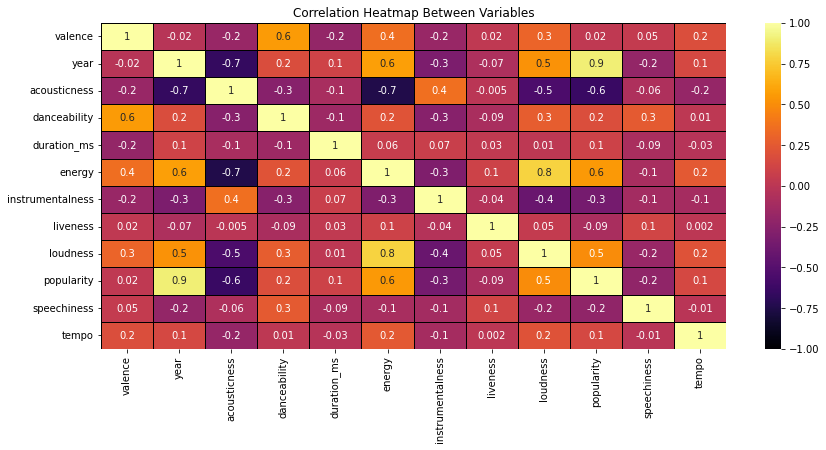

In [ ]:
corr_data = data.drop(["key", "mode", "explicit"], axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_data, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

Visualize the correlation matrix between the columns of a dataset. The correlation method used is Pearson's correlation coefficient

In [ ]:
sample_data = data.sample(int(0.004*len(data)))
print(len(sample_data))

337


The `sample` function in pandas is used to obtain a random sample of a DataFrame. The `int(0.004*len(data))` argument specifies the number of rows to be included in the sample, which is calculated as 0.4% of the total number of rows in the original DataFrame `data`.


The `len` function returns the number of rows in the original DataFrame, and `int` is used to convert the result of the multiplication into an integer, to ensure that `sample` takes a valid argument for the number of rows to be sampled.

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

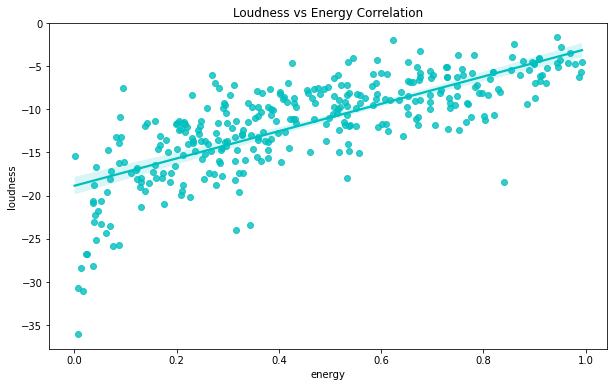

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_data, y ="loudness", x = "energy", color = "c").set(title = "Loudness vs Energy Correlation")

This code creates a scatter plot with a regression line using Seaborn and Matplotlib libraries. The x-axis represents the "energy" variable and the y-axis represents the "loudness" variable from the "sample_data" dataset.